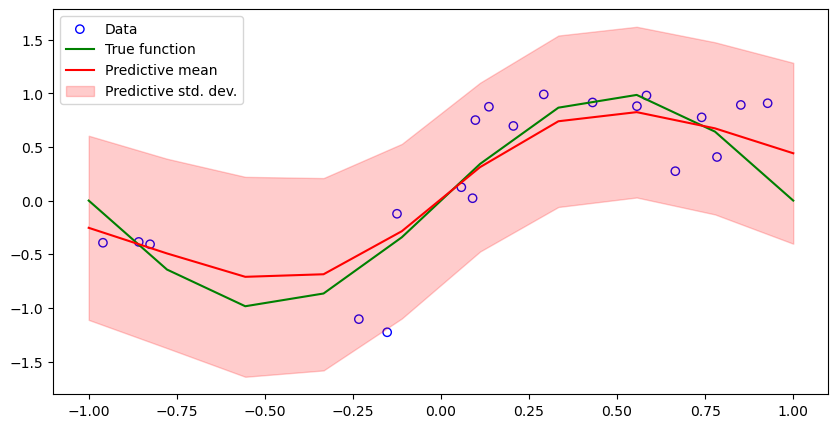

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the true function and generate some data
np.random.seed(0)
x_true = np.linspace(-1, 1, 100)
y_true = np.sin(np.pi * x_true)
x_data = np.random.uniform(-1, 1, size=20)
y_data = np.sin(np.pi * x_data) + np.random.normal(scale=0.3, size=x_data.shape)

# Define the basis functions
def basis_functions(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Parameters for the basis functions and the precision of the prior
mu = np.linspace(-1, 1, 10)
s = 0.3
alpha = 2.0

# Compute the basis matrix and the prior covariance
Phi = basis_functions(x_data, mu, s)
S0_inv = alpha * np.eye(mu.shape[0])
SN_inv = S0_inv + Phi.T @ Phi
SN = np.linalg.inv(SN_inv)

# Compute the posterior mean
mN = SN @ Phi.T @ y_data

# Compute the predictive mean and standard deviation
Phi_pred = basis_functions(x_true, mu, s)
y_pred = Phi_pred @ mN
y_pred_std = np.sqrt(1 / alpha + np.sum(Phi_pred @ SN * Phi_pred, axis=1))

# Plot the data, the true function, and the predictive distribution
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, facecolors='none', edgecolors='b', label='Data')
plt.plot(x_true, y_true, 'g', label='True function')
plt.plot(x_true, y_pred, 'r', label='Predictive mean')
plt.fill_between(x_true, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
plt.legend()
plt.show()

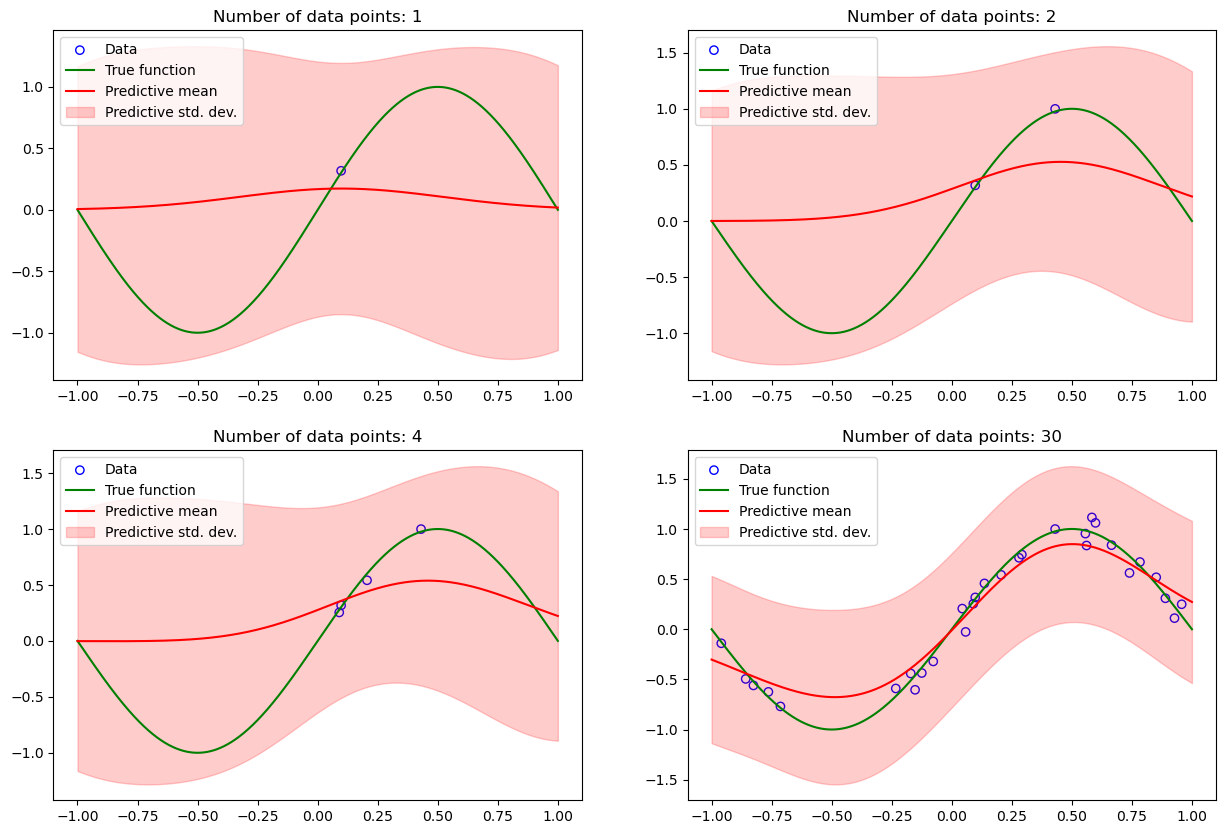

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the true function and generate some data
np.random.seed(0)
x_true = np.linspace(-1, 1, 1000)
y_true = np.sin(np.pi * x_true)
x_data = np.random.uniform(-1, 1, size=300)
y_data = np.sin(np.pi * x_data) + np.random.normal(scale=0.1, size=x_data.shape)

# Define the basis functions
def basis_functions(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Parameters for the basis functions and the precision of the prior
mu = np.linspace(-1, 1, 10)
s = 0.3
alpha = 2.0

# Compute the basis matrix and the prior covariance
Phi = basis_functions(x_data, mu, s)
S0_inv = alpha * np.eye(mu.shape[0])

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# List of number of data points to use for each plot
n_points = [1, 2, 4, 30]

for ax, n in zip(axs.ravel(), n_points):
    # Select the first n data points
    x_n = x_data[:n]
    y_n = y_data[:n]

    # Compute the posterior mean and covariance
    SN_inv = S0_inv + Phi[:n].T @ Phi[:n]
    SN = np.linalg.inv(SN_inv)
    mN = SN @ Phi[:n].T @ y_n

    # Compute the predictive mean and standard deviation
    Phi_pred = basis_functions(x_true, mu, s)
    y_pred = Phi_pred @ mN
    y_pred_std = np.sqrt(1 / alpha + np.sum(Phi_pred @ SN * Phi_pred, axis=1))

    # Plot the data, the true function, and the predictive distribution
    ax.scatter(x_n, y_n, facecolors='none', edgecolors='b', label='Data')
    ax.plot(x_true, y_true, 'g', label='True function')
    ax.plot(x_true, y_pred, 'r', label='Predictive mean')
    ax.fill_between(x_true, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
    ax.legend()
    ax.set_title(f'Number of data points: {n}')

plt.show()

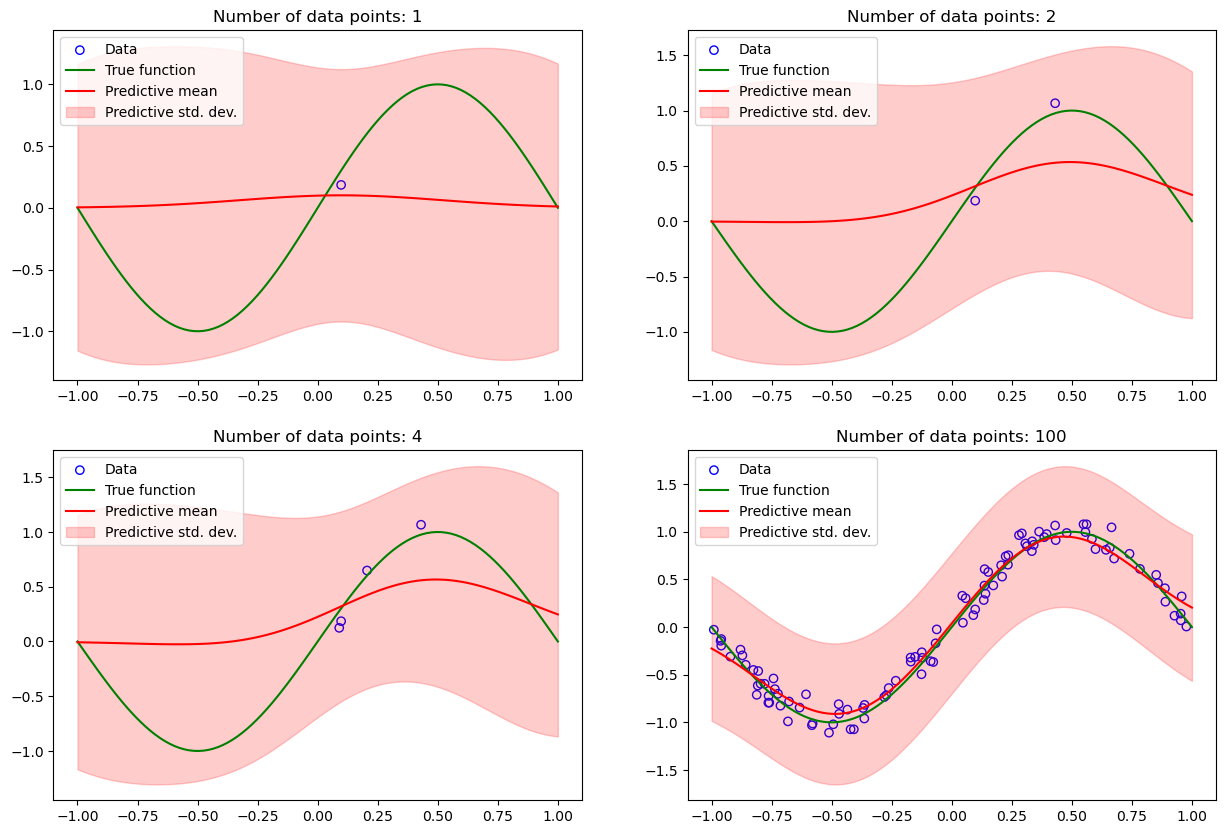

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the true function and generate some data
np.random.seed(0)
x_true = np.linspace(-1, 1, 100)
y_true = np.sin(np.pi * x_true)
x_data = np.random.uniform(-1, 1, size=100)
y_data = np.sin(np.pi * x_data) + np.random.normal(scale=0.1, size=x_data.shape)

# Define the basis functions
def basis_functions(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Parameters for the basis functions and the precision of the prior
mu = np.linspace(-1, 1, 10)
s = 0.3
alpha = 2.0

# Compute the basis matrix and the prior covariance
Phi = basis_functions(x_data, mu, s)
S0_inv = alpha * np.eye(mu.shape[0])

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# List of number of data points to use for each plot
n_points = [1, 2, 4, 100]

for ax, n in zip(axs.ravel(), n_points):
    # Select the first n data points
    x_n = x_data[:n]
    y_n = y_data[:n]

    # Compute the posterior mean and covariance
    SN_inv = S0_inv + Phi[:n].T @ Phi[:n]
    SN = np.linalg.inv(SN_inv)
    mN = SN @ Phi[:n].T @ y_n

    # Compute the predictive mean and standard deviation
    Phi_pred = basis_functions(x_true, mu, s)
    y_pred = Phi_pred @ mN
    y_pred_std = np.sqrt(1 / alpha + np.sum(Phi_pred @ SN * Phi_pred, axis=1))

    # Plot the data, the true function, and the predictive distribution
    ax.scatter(x_n, y_n, facecolors='none', edgecolors='b', label='Data')
    ax.plot(x_true, y_true, 'g', label='True function')
    ax.plot(x_true, y_pred, 'r', label='Predictive mean')
    ax.fill_between(x_true, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
    ax.legend()
    ax.set_title(f'Number of data points: {n}')

plt.show()

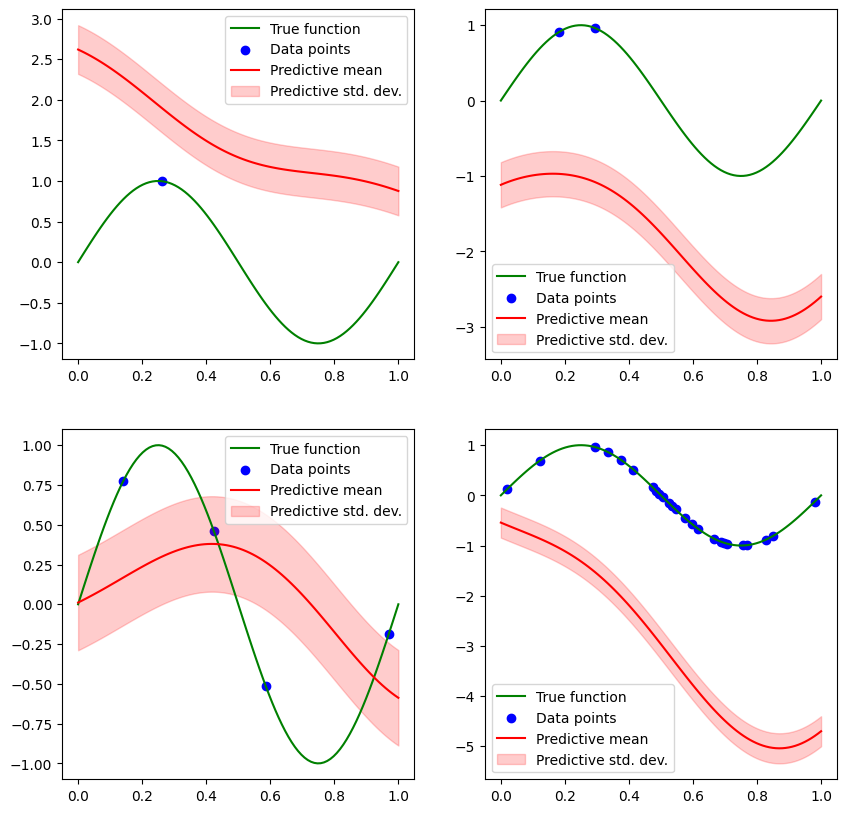

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function and generate some data
def true_function(x):
    return np.sin(2 * np.pi * x)

np.random.seed(0)
x = np.linspace(0, 1, 100)
y_true = true_function(x)

# Define the Gaussian basis functions
def gaussian_basis(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Define the model (a linear combination of Gaussian basis functions)
def model(x, w, mu, s):
    return np.sum(w * gaussian_basis(x, mu, s), axis=1)

# Generate some data points
N_values = [1, 2, 4, 25]
datasets = [np.random.choice(x, size=N, replace=False) for N in N_values]

# For each dataset, fit the model and plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, data in zip(axs.ravel(), datasets):
    # Fit the model to the data (this is where you would perform Bayesian linear regression)
    # For simplicity, we'll just use random weights here
    w = np.random.randn(len(mu))

    # Compute the predictive mean and standard deviation
    y_pred = model(x, w, mu, s)
    y_pred_std = 0.3  # This should be computed from your model

    # Plot the true function, the data points, and the predictive distribution
    ax.plot(x, y_true, 'g', label='True function')
    ax.scatter(data, true_function(data), color='b', label='Data points')
    ax.plot(x, y_pred, 'r', label='Predictive mean')
    ax.fill_between(x, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
    ax.legend()

plt.show()

In [ ]:
step = 0.25
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.3
alpha = 0.1

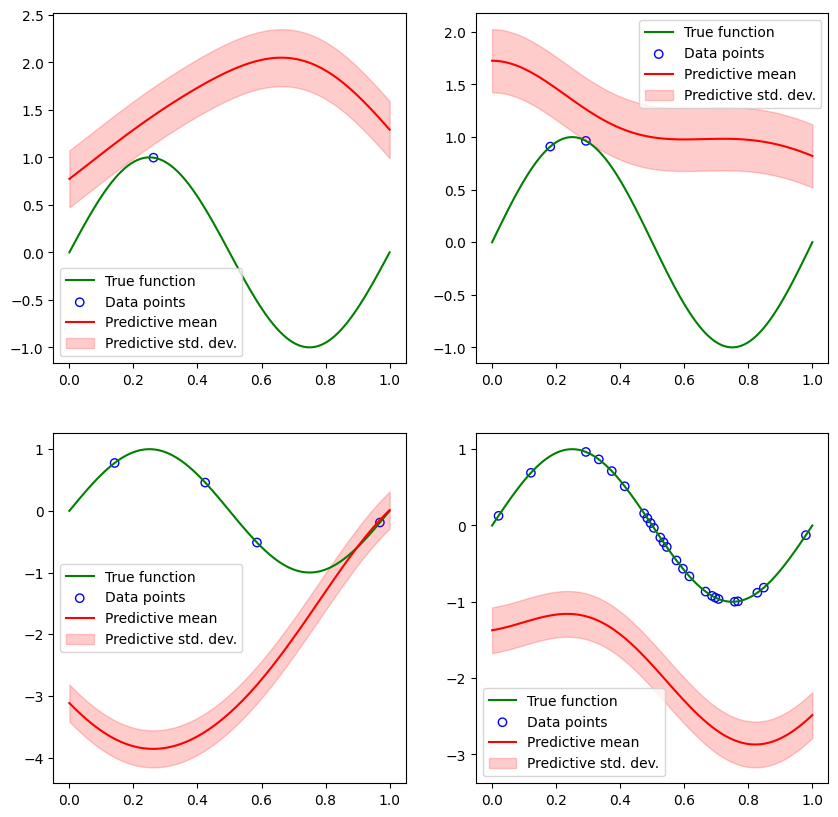

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function and generate some data
def true_function(x):
    return np.sin(2 * np.pi * x)

np.random.seed(0)
x = np.linspace(0, 1, 100)
y_true = true_function(x)

# Define the Gaussian basis functions
def gaussian_basis(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Define the model (a linear combination of Gaussian basis functions)
def model(x, w, mu, s):
    return np.sum(w * gaussian_basis(x, mu, s), axis=1)

# Generate some data points
N_values = [1, 2, 4, 25]
datasets = [np.random.choice(x, size=N, replace=False) for N in N_values]

# For each dataset, fit the model and plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, data in zip(axs.ravel(), datasets):
    # Fit the model to the data (this is where you would perform Bayesian linear regression)
    # For simplicity, we'll just use random weights here
    w = np.random.randn(len(mu))

    # Compute the predictive mean and standard deviation
    y_pred = model(x, w, mu, s)
    y_pred_std = 0.3  # This should be computed from your model

    # Plot the true function, the data points, and the predictive distribution
    ax.plot(x, y_true, 'g', label='True function')
    ax.scatter(data, true_function(data), facecolors='none', edgecolors='b', label='Data points')
    ax.plot(x, y_pred, 'r', label='Predictive mean')
    ax.fill_between(x, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
    ax.legend()

plt.show()

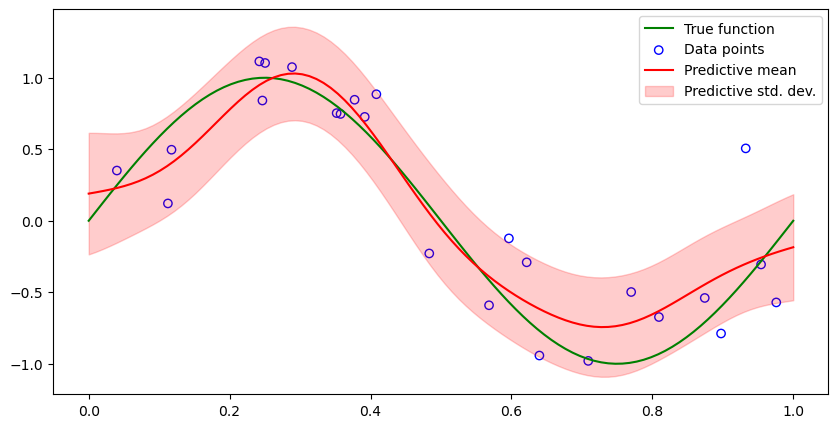

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function and generate some data
def true_function(x):
    return np.sin(2 * np.pi * x)

# np.random.seed(0)
x = np.linspace(0, 1, 100)
y_true = true_function(x)
x_data = np.random.uniform(0, 1, size=25)
y_data = true_function(x_data) + np.random.normal(scale=0.3, size=x_data.shape)

# Define the Gaussian basis functions
def gaussian_basis(x, mu, s):
    return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

# Parameters for the basis functions and the precision of the prior
mu = np.linspace(0, 1, 9)
s = 0.1
alpha = 2.0
beta = 1 / 0.3**2

# Compute the basis matrix
Phi = gaussian_basis(x_data, mu, s)

# Compute the posterior mean and covariance
SN_inv = alpha * np.eye(mu.shape[0]) + beta * Phi.T @ Phi
SN = np.linalg.inv(SN_inv)
mN = beta * SN @ Phi.T @ y_data

# Compute the predictive mean and standard deviation
Phi_pred = gaussian_basis(x, mu, s)
y_pred = Phi_pred @ mN
y_pred_std = np.sqrt(1 / beta + np.sum(Phi_pred @ SN * Phi_pred, axis=1))

# Plot the true function, the data points, and the predictive distribution
plt.figure(figsize=(10, 5))
plt.plot(x, y_true, 'g', label='True function')
plt.scatter(x_data, y_data, facecolors='none', edgecolors='b', label='Data points')
plt.plot(x, y_pred, 'r', label='Predictive mean')
plt.fill_between(x, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
plt.legend()
plt.show()

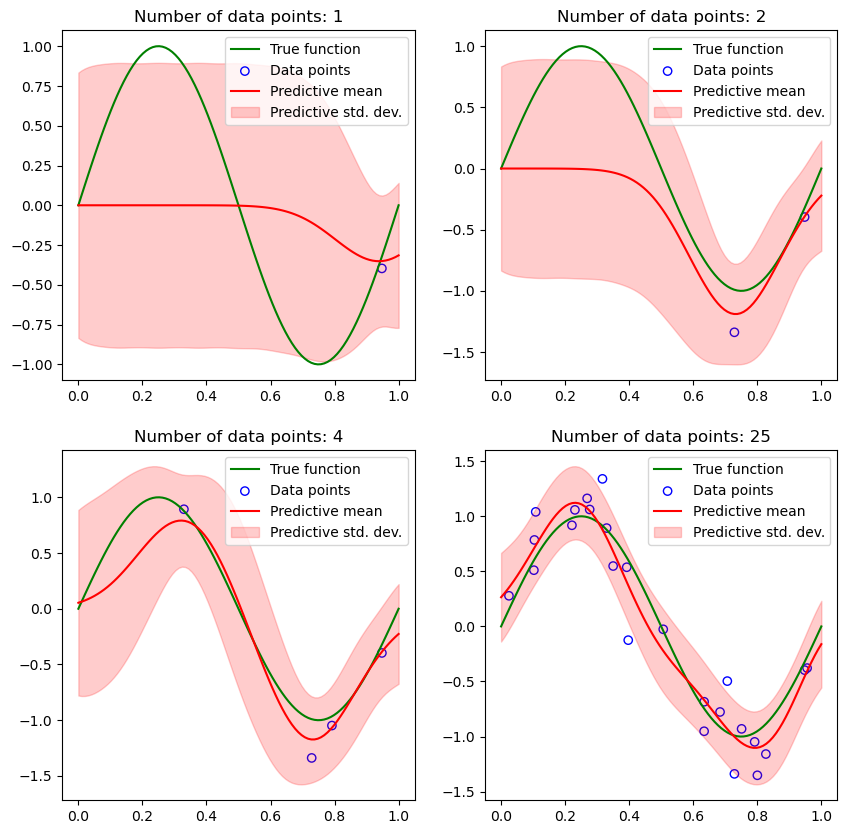

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function and generate some data
def true_function(x):
    return np.sin(2 * np.pi * x)

# np.random.seed(42)
x = np.linspace(0, 1, 100)
y_true = true_function(x)
x_data = np.random.uniform(0, 1, size=25)
y_data = true_function(x_data) + np.random.normal(scale=0.3, size=x_data.shape)

# Define the Gaussian basis functions
# def gaussian_basis(x, mu, s):
#     return np.exp(-0.5 * (x[:, None] - mu[None, :]) ** 2 / s ** 2)

def gaussian_prior(x, mean, variance):
    """
    Calculate the Gaussian prior probability for a given mean, variance, and data point x.

    Parameters:
        x (float): The data point for which to calculate the prior probability.
        mean (float): The mean of the Gaussian distribution.
        variance (float): The variance of the Gaussian distribution.

    Returns:
        float: The calculated Gaussian prior probability.
    """
    # Calculate the standard deviation from the variance
    std_dev = np.sqrt(variance)

    # Calculate the exponent part of the formula
    exponent = -((x - mean)**2) / (2 * variance)

    # Calculate and return the full formula result
    return (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(exponent)

# Parameters for the basis functions and the precision of the prior
mu = np.linspace(0, 1, 9)
s = 0.1
alpha = 2.0
beta = 1 / 0.3**2

# Compute the basis matrix
Phi = gaussian_basis(x_data, mu, s)

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# List of number of data points to use for each plot
N_values = [1, 2, 4, 25]

for ax, N in zip(axs.ravel(), N_values):
    # Select the first N data points
    x_N = x_data[:N]
    y_N = y_data[:N]
    Phi_N = Phi[:N]

    # Compute the posterior mean and covariance
    SN_inv = alpha * np.eye(mu.shape[0]) + beta * Phi_N.T @ Phi_N
    SN = np.linalg.inv(SN_inv)
    mN = beta * SN @ Phi_N.T @ y_N

    # Compute the predictive mean and standard deviation
    Phi_pred = gaussian_basis(x, mu, s)
    y_pred = Phi_pred @ mN
    y_pred_std = np.sqrt(1 / beta + np.sum(Phi_pred @ SN * Phi_pred, axis=1))

    # Plot the true function, the data points, and the predictive distribution
    ax.plot(x, y_true, 'g', label='True function')
    ax.scatter(x_N, y_N, facecolors='none', edgecolors='b', label='Data points')
    ax.plot(x, y_pred, 'r', label='Predictive mean')
    ax.fill_between(x, y_pred - y_pred_std, y_pred + y_pred_std, color='r', alpha=0.2, label='Predictive std. dev.')
    ax.legend()
    ax.set_title(f'Number of data points: {N}')

plt.show()